In [125]:
import pandas as pd
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Загрузите файл HR.csv в pandas dataframe

In [104]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# 1.satisfaction_level​ - Уровень удовлетворенности работой
# 2.Last_evaluation ​- Время с момента последней оценки в годах
# 3.number_projects​ - Количество проектов, выполненных за время работы
# 4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
# 5.time_spend_company​ - Стаж работы в компании в годах
# 6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
# 7.left​ - уволился ли сотрудник
# 8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
# 9.department ​- отдел в котором работает сотрудник
# 10.salary​ - относительный уровень зарплаты

### Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [36]:
num_df = df._get_numeric_data()
info = num_df.describe()
info.loc['med'] = [statistics.median(num_df[ser]) for ser in num_df]
info.loc['mode'] = [statistics.mode(num_df[ser]) for ser in num_df]
info

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
med,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

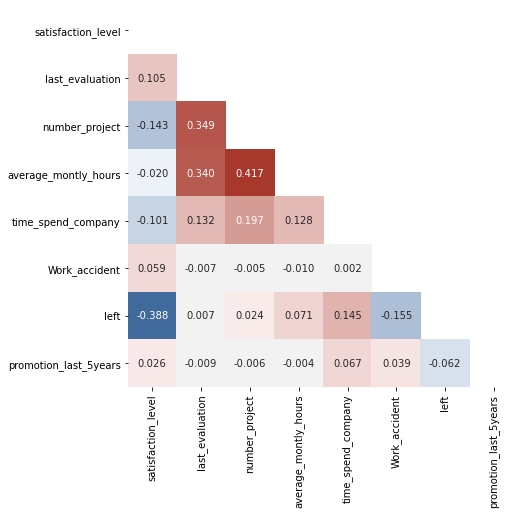

In [219]:
plt.figure(figsize=(7,7))

corr_matrix = num_df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
sns.heatmap(lower, annot=True, fmt='.3f', cbar=False, center=0, cmap=cmap);

две самые скоррелированные переменные: **Среднее количество часов на рабочем месте в месяц** и **Количество проектов, выполненных за время работы** (0.417)

две наименее скоррелированные переменные: **Стаж работы в компании в годах** и **Происходили ли несчастные случаи на рабочем месте с сотрудником** (0.002)


### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [59]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Показать распределение сотрудников по зарплатам

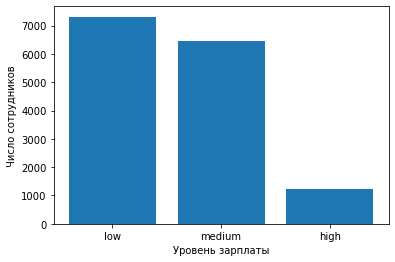

In [64]:
salary_levels = df.salary.value_counts()
labels, counts = salary_levels.index, salary_levels
plt.bar(labels, counts, align='center')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Число сотрудников')
plt.show()

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

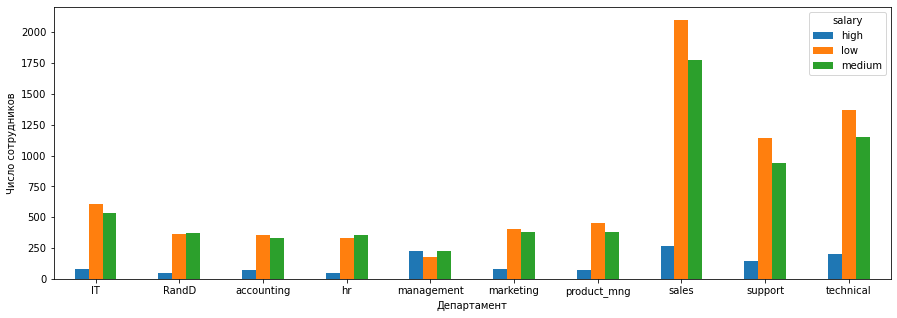

In [124]:
grouped_by_dep_sal = df.groupby(['department','salary']).size().unstack().plot.bar(rot=0, figsize=(15,5)) 
plt.ylabel('Число сотрудников')
plt.xlabel('Департамент')
plt.show()

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [211]:
hours_by_salary = [df[df.salary == salary_value].average_montly_hours for salary_value in df.salary.unique()]

In [131]:
F, p = stats.f_oneway(*hours_by_salary)
F, p

(0.4583624407867663, 0.6323271153144614)

Разница между выборочными средними времени, проведенного на работе, в разных зарплатных категориях незначительна (F-value стремится к 0, p-value > 0.05), корреляции между уровнем зарплаты и временем на работе нет, гипотеза отвергается. Убедимся в этом наглядно:

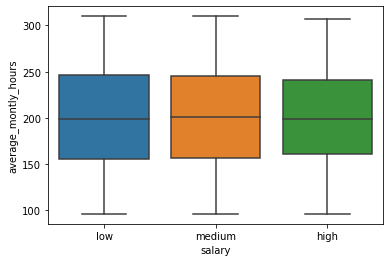

In [213]:
ax = sns.boxplot(x='salary', y='average_montly_hours', data=df)

### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности)

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [246]:
df_left = df.groupby('left').agg({'promotion_last_5years': lambda x: "{:.2%}".format(sum(x)/len(x)),
                                    'satisfaction_level':'mean',
                                    'number_project': 'mean'}).replace({'left': {0: 'нет', 1: 'да'}})
df_left

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,2.63%,0.666810,3.786664
1,0.53%,0.440098,3.855503


### Разделить данные на тестовую и обучающую выборки
### Построить модель LDA, предсказывающую, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
### Оценить качество модели на тестовой выборке

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [255]:
num_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


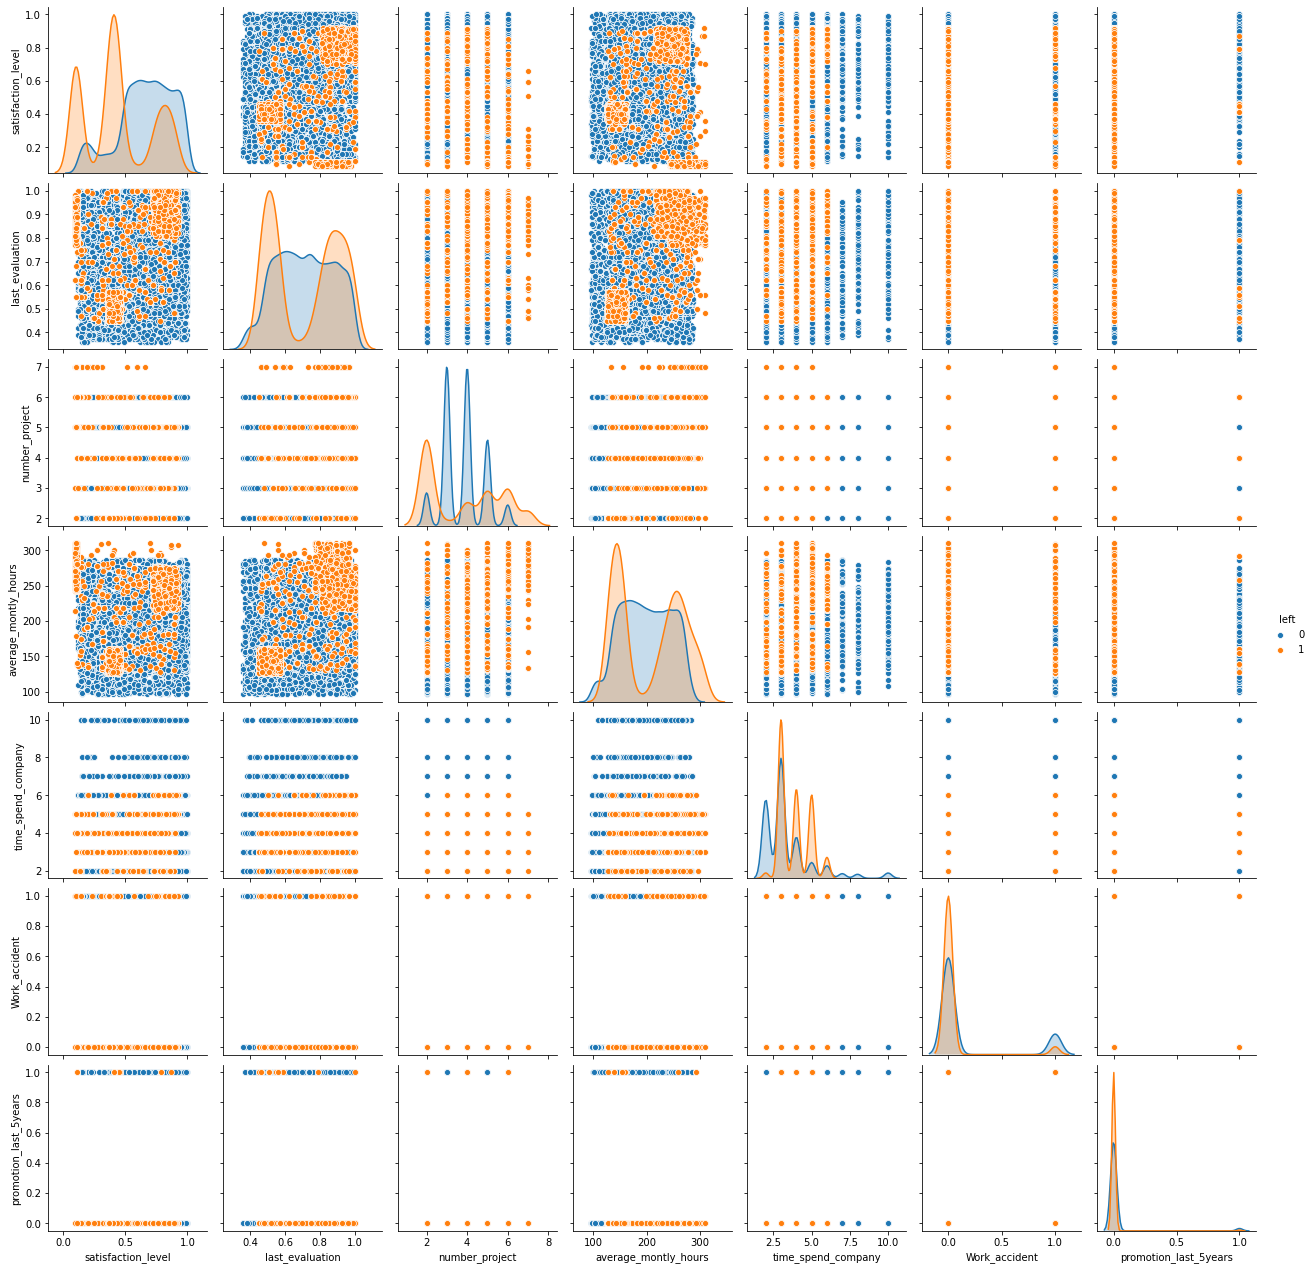

In [284]:
sns.pairplot(num_df, hue='left');

In [262]:
X = num_df.iloc[:, num_df.columns != 'left'].values
y = num_df.iloc[:, num_df.columns == 'left'].values

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [266]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train.ravel())
X_test = lda.transform(X_test)

In [272]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [275]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[2144  155]
 [ 401  300]]
Accuracy: 0.8146666666666667
